# Human Activity Data on Kaggle

https://www.kaggle.com/uciml/human-activity-recognition-with-smartphones

The Human Activity Recognition database was built from the recordings of 30 study participants (19 - 48 years old) performing activities of daily living (ADL) while carrying a waist-mounted smartphone with embedded inertial sensors. The objective is to classify activities into one of the six activities (WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING) performed.

They were wearing a smartphone (Samsung Galaxy S II) on the waist. Using its embedded accelerometer and gyroscope, we captured 3-axial linear acceleration and 3-axial angular velocity at a constant rate of 50Hz. The experiments have been video-recorded to label the data manually. 

The sensor signals (accelerometer and gyroscope) were pre-processed by applying noise filters and then sampled in fixed-width sliding windows of 2.56 sec and 50% overlap (128 readings/window). The sensor acceleration signal, which has gravitational and body motion components, was separated using a Butterworth low-pass filter into body acceleration and gravity. The gravitational force is assumed to have only low frequency components, therefore a filter with 0.3 Hz cutoff frequency was used. From each window, a vector of features was obtained by calculating variables from the time and frequency domain.

For each record in the dataset the following is provided:

- Triaxial acceleration from the accelerometer (total acceleration) and the estimated body acceleration.
- Triaxial Angular velocity from the gyroscope.
- A 561-feature vector with time and frequency domain variables.
- Its activity label.
- An identifier of the subject who carried out the experiment.

Notes: 
======
- Features are normalized and bounded within [-1,1].
- Each feature vector is a row on the text file.
- The units used for the accelerations (total and body) are 'g's (gravity of earth -> 9.80665 m/seg2).
- The gyroscope units are rad/seg.
- A video of the experiment including an example of the 6 recorded activities with one of the participants can be seen in the following link: http://www.youtube.com/watch?v=XOEN9W05_4A


## Load Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

% matplotlib inline

In [2]:
path = "./human-activity-recognition-with-smartphones/"
train_filename = "train.csv"
test_filename = "test.csv"
train = pd.read_csv(path+train_filename)
test = pd.read_csv(path+test_filename)

In [3]:
train.shape

(7352, 563)

In [4]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


Apparently, this dataset has been exploited by thousands of Kagglers and 97% accuracy is as easy as SVM + boosting. What I will do is try to predict for different subjects not activities.

However, the train and test set right now contains totally different subjects. What I will do is merge them, and randomly split the whole dataset into new train & test set.

In [5]:
# Merge current train and test
train_all = train.append(test)
# And split to 70% train, 30% test
from sklearn.model_selection import train_test_split
train, test = train_test_split(train_all, test_size = 0.3)

In [6]:
# Split into variables and labels
X_train = train.iloc[:, :-2].values
y_train = train.iloc[:,-2].values
activity_train = train.iloc[:,-1].values

X_test = test.iloc[:, :-2].values
y_test = test.iloc[:,-2].values
activity_test = test.iloc[:,-1].values

In [7]:
y_test

array([24, 25,  5, ..., 15,  2, 24])

In [8]:
y_test.shape

(3090,)

In [9]:
# Some descriptive analysis
label, counts = np.unique(y_train, return_counts=True)
label, counts

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 array([230, 212, 244, 238, 222, 230, 217, 194, 195, 202, 218, 224, 224,
        222, 228, 256, 265, 259, 238, 241, 295, 234, 267, 265, 286, 272,
        270, 252, 241, 268]))

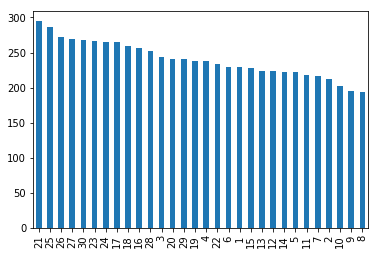

In [11]:
train['subject'].value_counts().plot(kind='bar')

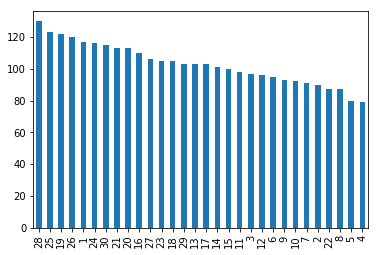

In [12]:
test['subject'].value_counts().plot(kind='bar')

The bar chart look pretty balanced. It seems that in training set, around 300 to 400 records were recorded for each and for test set 80 ~ 110 records were there for each.

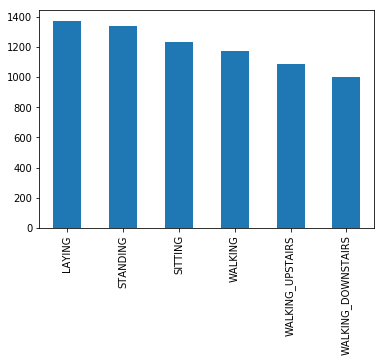

In [13]:
train['Activity'].value_counts().plot(kind='bar')

Although different people may very well sit, stand or lie down differnetly, I assume that the differences become more obvious when we are moving. So I will split the dataset into 2 subgroups, sedentary and moving, corresponds to laying + standing + sitting and walking + walking upstairs + walking downstairs respectively. 

In [14]:
y_train

array([23, 21,  5, ..., 30, 25, 10])

In [15]:
activity_train.shape

(7209,)

In [16]:
train_sedentary_ind = [i for i, a in enumerate(activity_train) if a == 'LAYING' or a == 'STANDING' or a == 'SITTING']
train_moving_ind = [i for i, a in enumerate(activity_train) if a == 'WALKING' or a == 'WALKING_UPSTAIRS' or a == 'WALKING_DOWNSTAIRS']
test_sedentary_ind = [i for i, a in enumerate(activity_test) if a == 'LAYING' or a == 'STANDING' or a == 'SITTING']
test_moving_ind = [i for i, a in enumerate(activity_test) if a == 'WALKING' or a == 'WALKING_UPSTAIRS' or a == 'WALKING_DOWNSTAIRS']

In [17]:
len(train_sedentary_ind), len(train_moving_ind)

(3950, 3259)

In [18]:
len(test_sedentary_ind), len(test_moving_ind)

(1677, 1413)

In [19]:
# features
X_train_sedentary = X_train[train_sedentary_ind, :]
X_train_moving = X_train[train_moving_ind, :]

X_test_sedentary = X_test[test_sedentary_ind, :]
X_test_moving = X_test[test_moving_ind, :]

In [20]:
# labels 
y_train_sedentary = y_train[train_sedentary_ind]
y_train_moving = y_train[train_moving_ind]

y_test_sedentary = y_test[test_sedentary_ind]
y_test_moving = y_test[test_moving_ind]

In [21]:
train.columns.tolist()[9]

'tBodyAcc-max()-X'

/Users/Tina/anaconda/envs/py27/lib/python2.7/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


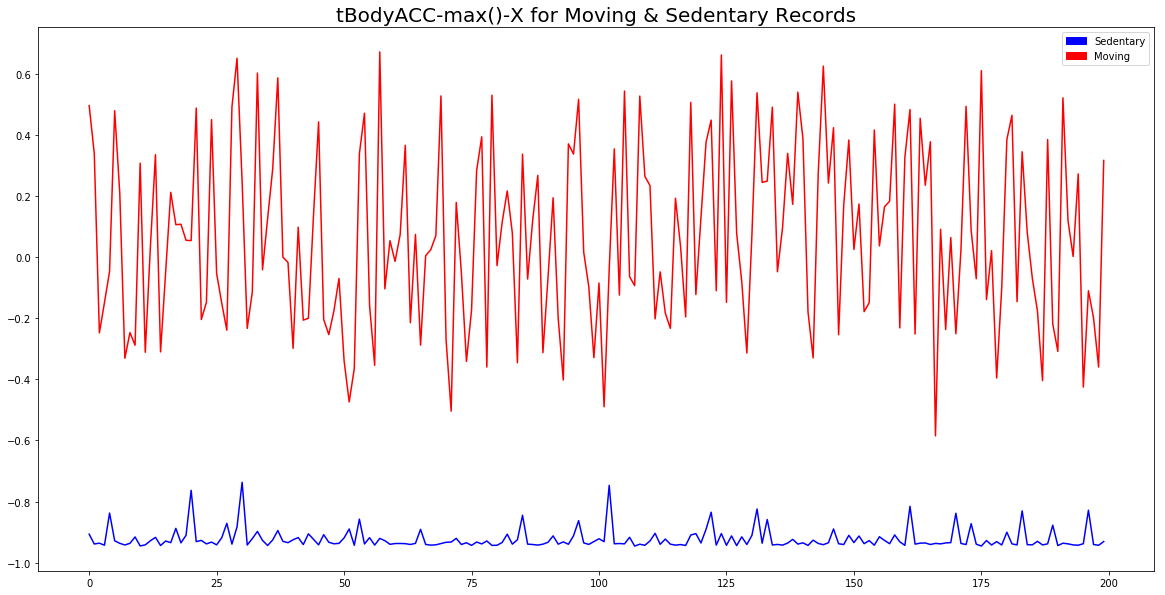

In [22]:
# Plot the max acceleration on the X axis

fig = plt.figure(figsize=(20,10)) 
plt.gca().set_color_cycle(['blue', 'red'])
plt.plot(X_train_sedentary[:200, 9])
plt.plot(X_train_moving[:200, 9])

blue_patch = mpatches.Patch(color='blue', label='Sedentary')
yellow_patch = mpatches.Patch(color='red', label='Moving')
plt.legend(handles=[blue_patch, yellow_patch])
plt.title("tBodyACC-max()-X for Moving & Sedentary Records", fontsize=20)

The sensor data for moving and sedentary activities are actually very different as we expected. I will try to build a subject classifier using moving data and sedentary data respectively and see which one performs better. And this will give us an idea about are we more different when we move, or when we don't move.

Probably it will also make sense if we get more data of the subjects, their age, gender, weight, height we can try to run regression against these attribtues and find if there is a common trend in how people move and not move with regards to their physical conditions.


## Data Preprocessing


### Feature Selection 


### 1. Manually Examination into the Features


Original Feature Explanation

The features selected for this database come from the accelerometer and gyroscope 3-axial raw signals tAcc-XYZ and tGyro-XYZ. These time domain signals (prefix 't' to denote time) were captured at a constant rate of 50 Hz. Then they were filtered using a median filter and a 3rd order low pass Butterworth filter with a corner frequency of 20 Hz to remove noise. Similarly, the acceleration signal was then separated into body and gravity acceleration signals (tBodyAcc-XYZ and tGravityAcc-XYZ) using another low pass Butterworth filter with a corner frequency of 0.3 Hz. 

Subsequently, the body linear acceleration and angular velocity were derived in time to obtain Jerk signals (tBodyAccJerk-XYZ and tBodyGyroJerk-XYZ). Also the magnitude of these three-dimensional signals were calculated using the Euclidean norm (tBodyAccMag, tGravityAccMag, tBodyAccJerkMag, tBodyGyroMag, tBodyGyroJerkMag). 

Finally a Fast Fourier Transform (FFT) was applied to some of these signals producing fBodyAcc-XYZ, fBodyAccJerk-XYZ, fBodyGyro-XYZ, fBodyAccJerkMag, fBodyGyroMag, fBodyGyroJerkMag. (Note the 'f' to indicate frequency domain signals). 

These signals were used to estimate variables of the feature vector for each pattern:  
'-XYZ' is used to denote 3-axial signals in the X, Y and Z directions.



1. The acceleometer data was separated into body and gravity accleration signals using a low pass Butterworth filter with a corner frequency of 0.3 HZ. I will assume that the gravity accleration is the same for everyone and won't affect the individual movements too much. So first all the gravity features were removed.


In [23]:
train_all.shape

(10299, 563)

In [24]:
features_all = train_all.columns.tolist()

In [25]:
features_remove_gravity = [x for x in features_all if "gravity" not in x.lower()]

In [26]:
len(features_remove_gravity)

503


60 gravity acceleration related features were removed. 



1. 
2. Now I wanted to separate all the jerk signals computed from the body linear acceleration and angular velocity from the original data. And also the magnitude of these signals.

The reason for that is a paper suggested that jerk-filtered signal can produce robust features and thus improve the recognition accuracy remarkably because it's orientation-independent. And by looking at the graph below, the change in acceleration is very clearly represented by the jerk data.

http://ieeexplore.ieee.org/document/6121760/

![Jerk vs Acceleration](https://upload.wikimedia.org/wikipedia/commons/thumb/4/43/Schematic_diagram_of_Jerk%2C_Acceleration%2C_and_Speed.svg/720px-Schematic_diagram_of_Jerk%2C_Acceleration%2C_and_Speed.svg.png
)



In [27]:
features_no_jerk = [x for x in features_remove_gravity if "jerk" not in x.lower() and "mag" not in x.lower()]

In [28]:
len(features_no_jerk)

240

263 features were removed.

In [29]:
features_jerk = [x for x in features_remove_gravity if "jerk" in x.lower()]

In [30]:
len(features_jerk)

211

1. 
2. 
3. Now I want to separate FFT data with original signals


Fourier analysis converts a signal from its original domain (often time or space) to a representation in the frequency domain and vice versa. 

In [299]:
features_nojerk_t = [x for x in features_no_jerk if x.startswith("t")]
features_nojerk_f = [x for x in features_no_jerk if x.startswith("f")]
features_jerk_t = [x for x in features_jerk if x.startswith("t")]
features_jerk_f = [x for x in features_jerk if x.startswith("f")]

In [300]:
len(features_nojerk_t), len(features_nojerk_f), len(features_jerk_t), len(features_jerk_f)

(80, 158, 106, 105)

Now let's create the 4 different feature set training & testing datasets.

In [301]:
all_nojerk_t = train_all[features_nojerk_t]

In [306]:
type(X_train_sedentary)

numpy.ndarray

In [313]:
# Split into variables and labels
# No Jerk Time Data
X_train_nojerk_t = train[features_nojerk_t].iloc[:, :-2].values
y_train_nojerk_t = train[features_nojerk_t].iloc[:,-2].values

X_test_nojerk_t = test[features_nojerk_t].iloc[:, :-2].values
y_test_nojerk_t = test[features_nojerk_t].iloc[:,-2].values

(3090, 78)

In [314]:
# features
X_train_sedentary_nojerk_t = X_train_nojerk_t[train_sedentary_ind, :]
X_train_moving_nojerk_t = X_train_nojerk_t[train_moving_ind, :]

X_test_sedentary_nojerk_t = X_test_nojerk_t[test_sedentary_ind, :]
X_test_moving_nojerk_t = X_test_nojerk_t[test_moving_ind, :]

In [315]:
# labels
y_train_sedentary_nojerk_t = y_train_nojerk_t[train_sedentary_ind]
y_train_moving_nojerk_t = y_train_nojerk_t[train_moving_ind]

y_test_sedentary_nojerk_t = y_test_nojerk_t[test_sedentary_ind]
y_test_moving_nojerk_t = y_test_nojerk_t[test_moving_ind]

In [316]:
# No jerk frequency data
X_train_nojerk_f = train[features_nojerk_f].iloc[:, :-2].values
y_train_nojerk_f = train[features_nojerk_f].iloc[:,-2].values

X_test_nojerk_f = test[features_nojerk_f].iloc[:, :-2].values
y_test_nojerk_f = test[features_nojerk_f].iloc[:,-2].values

# features
X_train_sedentary_nojerk_f = X_train_nojerk_f[train_sedentary_ind, :]
X_train_moving_nojerk_f = X_train_nojerk_f[train_moving_ind, :]

X_test_sedentary_nojerk_f = X_test_nojerk_f[test_sedentary_ind, :]
X_test_moving_nojerk_f = X_test_nojerk_f[test_moving_ind, :]

# labels
y_train_sedentary_nojerk_f = y_train_nojerk_f[train_sedentary_ind]
y_train_moving_nojerk_f = y_train_nojerk_f[train_moving_ind]

y_test_sedentary_nojerk_f = y_test_nojerk_f[test_sedentary_ind]
y_test_moving_nojerk_f = y_test_nojerk_f[test_moving_ind]

In [318]:
#  jerk time data
X_train_jerk_t = train[features_jerk_t].iloc[:, :-2].values
y_train_jerk_t = train[features_jerk_t].iloc[:,-2].values

X_test_jerk_t = test[features_jerk_t].iloc[:, :-2].values
y_test_jerk_t = test[features_jerk_t].iloc[:,-2].values

# features
X_train_sedentary_jerk_t = X_train_jerk_t[train_sedentary_ind, :]
X_train_moving_jerk_t = X_train_jerk_t[train_moving_ind, :]

X_test_sedentary_jerk_t = X_test_jerk_t[test_sedentary_ind, :]
X_test_moving_jerk_t = X_test_jerk_t[test_moving_ind, :]

# labels
y_train_sedentary_jerk_t = y_train_jerk_t[train_sedentary_ind]
y_train_moving_jerk_t = y_train_jerk_t[train_moving_ind]

y_test_sedentary_jerk_t = y_test_jerk_t[test_sedentary_ind]
y_test_moving_jerk_t = y_test_jerk_t[test_moving_ind]

In [317]:
#  jerk frequency data
X_train_jerk_f = train[features_jerk_f].iloc[:, :-2].values
y_train_jerk_f = train[features_jerk_f].iloc[:,-2].values

X_test_jerk_f = test[features_jerk_f].iloc[:, :-2].values
y_test_jerk_f = test[features_jerk_f].iloc[:,-2].values

# features
X_train_sedentary_jerk_f = X_train_jerk_f[train_sedentary_ind, :]
X_train_moving_jerk_f = X_train_jerk_f[train_moving_ind, :]

X_test_sedentary_jerk_f = X_test_jerk_f[test_sedentary_ind, :]
X_test_moving_jerk_f = X_test_jerk_f[test_moving_ind, :]

# labels
y_train_sedentary_jerk_f = y_train_jerk_f[train_sedentary_ind]
y_train_moving_jerk_f = y_train_jerk_f[train_moving_ind]

y_test_sedentary_jerk_f = y_test_jerk_f[test_sedentary_ind]
y_test_moving_jerk_f = y_test_jerk_f[test_moving_ind]

### 2. Feature Selection Algorithms

- LinearSVC for moving data



We can see from here that we are facing a very different problem as we were having before. We have way too many features (563) for our model to avoid overfitting and generalize well in the test set. So we need to perform some feature selection/engineering before fed all of them into a model.

It also right in our intuitions because the sensors put on the same spot on yor left & right legs may have very similar readings but a delay in time. (if your walking is symmetric enough) It would be redundant to include all of the counterpairs. 


In [82]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X_train_moving, y_train_moving)
lsvc = SelectFromModel(lsvc, prefit=True)
X_train_moving_svc = lsvc.transform(X_train_moving)
X_train_moving_svc.shape

(3259, 119)


The linearSVC model selected 119 features out of 562, roughly 20% of them.

In [83]:
X_test_moving_svc = lsvc.transform(X_test_moving)

- LinearSVC for sedentary data

Let's do the same feature selection for sedentary data.

In [84]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X_train_sedentary, y_train_sedentary)
lsvc = SelectFromModel(lsvc, prefit=True)
X_train_sedentary_svc = lsvc.transform(X_train_sedentary)
X_train_sedentary_svc.shape

(3950, 159)

In [85]:
X_test_sedentary_svc = lsvc.transform(X_test_sedentary)

For sedentary data, our feature selection algorithm has chosen 159 features, roughly 33% more than moving data, which means that sedentary records have less variance and share less correlations.

- Select K Best


- Mutual Information Feature Selection

Parallelized Mutual Information based Feature Selection module.

http://danielhomola.com/2016/01/31/mifs-parallelized-mutual-information-based-feature-selection-module/

maximam joint mutual information

In [373]:
import mrmr

AttributeError: 'module' object has no attribute 'BaseMrmr'

In [362]:
import mifs
# define MI_FS feature selection method
feat_selector = mifs.MutualInformationFeatureSelector()

# find all relevant features
feat_selector.fit(X_train_moving, y_train_moving)

# check selected features
feat_selector.support_

# call transform() on X to filter it down to selected features
X_train_moving_mifs = feat_selector.transform(X_train_moving)
X_test_moving_mifs = feat_selector.transform(X_test_moving)

ImportError: No module named mifs

Note: Sequential Forward Selection (SFS): experimented, but takes a very long time to select larger amount of features

- PCA for moving data

In [55]:
from sklearn.decomposition import PCA
pca = PCA(n_components=100, svd_solver='full')
X_train_moving_pca = pca.fit_transform(X_train_moving)  
X_test_moving_pca = pca.transform(X_test_moving)  

- PCA for sedentary data

In [75]:
from sklearn.decomposition import PCA
pca = PCA(n_components=100, svd_solver='full')
X_train_sedentary_pca = pca.fit_transform(X_train_sedentary)  
X_test_sedentary_pca = pca.transform(X_test_sedentary)

In [170]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X_train_sedentary, y_train_sedentary)
lsvc = SelectFromModel(lsvc, prefit=True)
X_train_sedentary_new = lsvc.transform(X_train_sedentary)
X_train_sedentary_new.shape

(3890, 170)

### Normalization

Our data was already normalized to the range [-1, 1] so that would be all for the preprocessing so far.

## Modeling - Moving

### Choice of Models

As discussed in a literature review of Human Activity Recognition studies, different models including decision trees, KNN, HMM, SVM have been used and it's not fully clear yet which approach performs better. I would like to explore different methods on different feature sets I have chosen and see what the results are like.

“Frequentist and Bayesian models have been well covered throughout HAR literature, they involve predictive models such as binary decision trees and threshold-based classifiers, geometric approaches including K-Nearest Neighbors (KNN), Artificial Neural Networks (ANN) and Sup- port Vector Machines (SVM), and probabilistic classification methods as for example Naive Bayes classifiers, and Hidden Markov Models (HMM).

It is not fully clear which ML approach performs better for HAR as many of them have demonstrated comparable performance in different works. The op- timal classification method is generally application-specific and aspects such as the recognition performance, energy consumption, memory requirements and com- putational complexity become deciding factors. For instance decision trees could be preferred when the model interpretability is required and SVMs for high performance applications. Continuous work in regards to computational cost reductions have con- stantly been studied such as modified efficient implementations of the ML algorithms as proposed in, where a purely fixed-point arithmetic approach for HAR using SVMs was presented.”


Human Activity and Motion Disorder Recognition: Towards Smarter Interactive Cognitive Environments
Jorge L. Reyes-Ortiz1,2, Alessandro Ghio1, Davide Anguita1, Xavier Parra2, Joan Cabestany2, Andreu Catala`2
1- Universita` degli Studi di Genova - DITEN. Via Opera Pia 11A, I-16145, Genoa, Italy.
2- Universitat Polite`cnica de Catalunya - CETpD Rambla de l’Exposicio ́ 59-69, 08800, Vilanova i la Geltru ́, Spain.


### Baseline - Randomly Guessing

This is a baseline because by intuition any other informed classifier outperform this classifier.

In [188]:
from random import randint
rand_pred_moving = []
for x in X_test_moving_new:
    # generate a random number between 1 and 30 (including 1 & 30)
    rand_pred_moving.append(randint(1, 31))
rand_pred_moving = np.asarray(rand_pred_moving)

In [209]:
rand_res = [1 if a == b else 0 for a, b in zip(rand_pred_moving, y_test_moving)]
rand_acc = float(sum(rand_res))/len(rand_res)
rand_acc

0.028085735402808575

So randomly predicting almost failed the job, with only 3% accuracy.

In [53]:
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm

Classifiers = [linear_model.LogisticRegression(multi_class="ovr"),
               DecisionTreeClassifier(), 
               RandomForestClassifier(n_estimators=200),
               GaussianNB(), 
               svm.SVC()]

In [86]:
from sklearn.metrics import accuracy_score
from time import time
model = []
accuracy = []
train_time = []
pred_time = []

for clf in Classifiers:
    start = time()
    fit=clf.fit(X_train_moving_svc, y_train_moving)
    end = time()
    train_time.append(end - start)
    start = time()
    pred=fit.predict(X_test_moving_svc)
    end = time()
    pred_time.append(end - start)
    model.append(clf.__class__.__name__)
    accuracy.append(accuracy_score(y_test_moving,pred))
    print "finished training for SVC features using " + clf.__class__.__name__


finished training for LogisticRegression
finished training for DecisionTreeClassifier
finished training for RandomForestClassifier
finished training for GaussianNB
finished training for SVC


In [87]:
# Give shorter name for plotting 
model = ['LR', 'DT', 'RF', 'GNB', 'SVM']

In [88]:
from sklearn.metrics import accuracy_score
from time import time

pca_accuracy = []
pca_train_time = []
pca_pred_time = []

for clf in Classifiers:
    start = time()
    fit=clf.fit(X_train_moving_pca, y_train_moving)
    end = time()
    pca_train_time.append(end - start)
    start = time()
    pred=fit.predict(X_test_moving_pca)
    end = time()
    pca_pred_time.append(end - start)
    pca_accuracy.append(accuracy_score(y_test_moving, pred))
    print "finished training for PCA features using " + clf.__class__.__name__


finished training for PCA features using LogisticRegression
finished training for PCA features using DecisionTreeClassifier
finished training for PCA features using RandomForestClassifier
finished training for PCA features using GaussianNB
finished training for PCA features using SVC


In [89]:
# Give shorter name for plotting 
model = ['LR', 'DT', 'RF', 'GNB', 'SVM']

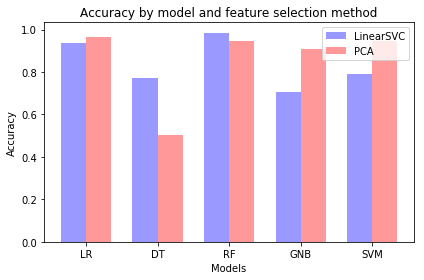

In [91]:
# Plot the accuracy for each classifier

fig, ax = plt.subplots()

index = np.arange(len(model))
bar_width = 0.35
opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = plt.bar(index, accuracy, bar_width,
                 alpha=opacity,
                 color='b',
                 error_kw=error_config,
                 label='LinearSVC')

rects2 = plt.bar(index + bar_width, pca_accuracy, bar_width,
                 alpha=opacity,
                 color='r',
                 error_kw=error_config,
                 label='PCA')

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy by model and feature selection method')
plt.xticks(index + bar_width / 2, ('LR', 'DT', 'RF', 'GNB', 'SVM'))
plt.legend()

plt.tight_layout()

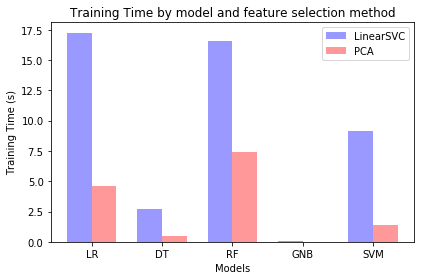

In [71]:
# Plot the training time for each classifier
fig, ax = plt.subplots()

index = np.arange(len(model))
bar_width = 0.35
opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = plt.bar(index, train_time, bar_width,
                 alpha=opacity,
                 color='b',
                 error_kw=error_config,
                 label='LinearSVC')

rects2 = plt.bar(index + bar_width, pca_train_time, bar_width,
                 alpha=opacity,
                 color='r',
                 error_kw=error_config,
                 label='PCA')

plt.xlabel('Models')
plt.ylabel('Training Time (s)')
plt.title('Training Time by model and feature selection method')
plt.xticks(index + bar_width / 2, ('LR', 'DT', 'RF', 'GNB', 'SVM'))
plt.legend()

plt.tight_layout()



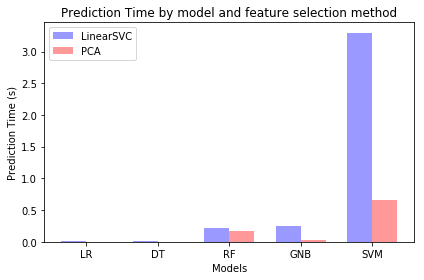

In [73]:
# Plot the prediction time for each classifier
fig, ax = plt.subplots()

index = np.arange(len(model))
bar_width = 0.35
opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = plt.bar(index, pred_time, bar_width,
                 alpha=opacity,
                 color='b',
                 error_kw=error_config,
                 label='LinearSVC')

rects2 = plt.bar(index + bar_width, pca_pred_time, bar_width,
                 alpha=opacity,
                 color='r',
                 error_kw=error_config,
                 label='PCA')

plt.xlabel('Models')
plt.ylabel('Prediction Time (s)')
plt.title('Prediction Time by model and feature selection method')
plt.xticks(index + bar_width / 2, ('LR', 'DT', 'RF', 'GNB', 'SVM'))
plt.legend()

plt.tight_layout()



## Conclusions



And we can see here, with similar performance results, linear regression and random forest are much faster than gradient boosting in training and predicting. Linear regression is also faster than random forest for prediction.

### Manually selected features modeling

## Modeling - Sedentary


### Baseline - Randomly guessing

In [178]:
from random import randint
rand_pred_sedentary = []
for x in X_test_sedentary_new:
    # generate a random number between 1 and 30 (including 1 & 30)
    rand_pred_sedentary.append(randint(1, 31))
rand_pred_sedentary = np.asarray(rand_pred_sedentary)

In [186]:
res = [1 if a == b else 0 for a, b in zip(rand_pred_sedentary, y_test_sedentary)]

In [187]:
acc = float(sum(res))/len(res)
acc

0.02936096718480138

The result for randomly predicting is also around 3%, similar to moving ones, as expected.

Now let's try the same classifiers we tried with moving data.

In [92]:
model = []
accuracy = []
train_time = []
pred_time = []

for clf in Classifiers:
    start = time()
    fit=clf.fit(X_train_sedentary_svc, y_train_sedentary)
    end = time()
    train_time.append(end - start)
    start = time()
    pred=fit.predict(X_test_sedentary_svc)
    end = time()
    pred_time.append(end - start)
    model.append(clf.__class__.__name__)
    accuracy.append(accuracy_score(y_test_sedentary, pred))
    print "finished training for SVC features using " + clf.__class__.__name__

finished training for SVC features using LogisticRegression
finished training for SVC features using DecisionTreeClassifier
finished training for SVC features using RandomForestClassifier
finished training for SVC features using GaussianNB
finished training for SVC features using SVC


In [93]:
model

['LogisticRegression',
 'DecisionTreeClassifier',
 'RandomForestClassifier',
 'GaussianNB',
 'SVC']

In [94]:
model = ['LR', 'DT', 'RF', 'GNB', 'SVM']

In [98]:
from sklearn.metrics import accuracy_score
from time import time

pca_accuracy = []
pca_train_time = []
pca_pred_time = []

for clf in Classifiers:
    start = time()
    fit=clf.fit(X_train_sedentary_pca, y_train_sedentary)
    end = time()
    pca_train_time.append(end - start)
    start = time()
    pred=fit.predict(X_test_sedentary_pca)
    end = time()
    pca_pred_time.append(end - start)
    pca_accuracy.append(accuracy_score(y_test_sedentary, pred))
    print "finished training for PCA features using " + clf.__class__.__name__


finished training for PCA features using LogisticRegression
finished training for PCA features using DecisionTreeClassifier
finished training for PCA features using RandomForestClassifier
finished training for PCA features using GaussianNB
finished training for PCA features using SVC


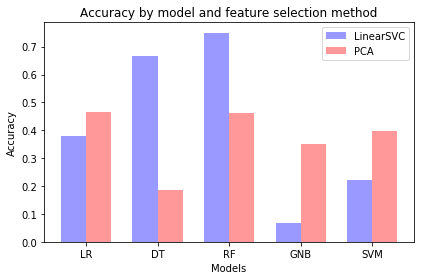

In [99]:
# Plot the accuracy for each classifier

fig, ax = plt.subplots()

index = np.arange(len(model))
bar_width = 0.35
opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = plt.bar(index, accuracy, bar_width,
                 alpha=opacity,
                 color='b',
                 error_kw=error_config,
                 label='LinearSVC')

rects2 = plt.bar(index + bar_width, pca_accuracy, bar_width,
                 alpha=opacity,
                 color='r',
                 error_kw=error_config,
                 label='PCA')

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy by model and feature selection method')
plt.xticks(index + bar_width / 2, ('LR', 'DT', 'RF', 'GNB', 'SVM'))
plt.legend()

plt.tight_layout()

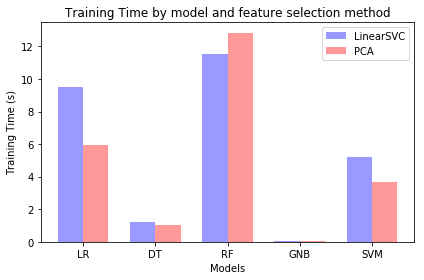

In [100]:
# Plot the training time for each classifier
fig, ax = plt.subplots()

index = np.arange(len(model))
bar_width = 0.35
opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = plt.bar(index, train_time, bar_width,
                 alpha=opacity,
                 color='b',
                 error_kw=error_config,
                 label='LinearSVC')

rects2 = plt.bar(index + bar_width, pca_train_time, bar_width,
                 alpha=opacity,
                 color='r',
                 error_kw=error_config,
                 label='PCA')

plt.xlabel('Models')
plt.ylabel('Training Time (s)')
plt.title('Training Time by model and feature selection method')
plt.xticks(index + bar_width / 2, ('LR', 'DT', 'RF', 'GNB', 'SVM'))
plt.legend()

plt.tight_layout()



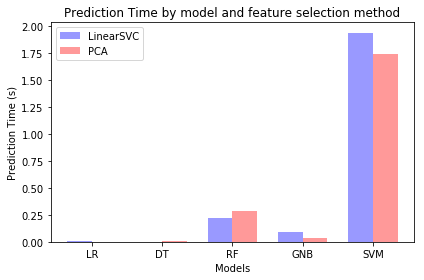

In [101]:
# Plot the prediction time for each classifier
fig, ax = plt.subplots()

index = np.arange(len(model))
bar_width = 0.35
opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = plt.bar(index, pred_time, bar_width,
                 alpha=opacity,
                 color='b',
                 error_kw=error_config,
                 label='LinearSVC')

rects2 = plt.bar(index + bar_width, pca_pred_time, bar_width,
                 alpha=opacity,
                 color='r',
                 error_kw=error_config,
                 label='PCA')

plt.xlabel('Models')
plt.ylabel('Prediction Time (s)')
plt.title('Prediction Time by model and feature selection method')
plt.xticks(index + bar_width / 2, ('LR', 'DT', 'RF', 'GNB', 'SVM'))
plt.legend()

plt.tight_layout()



## Conclusion

So for sedentary data, the overall accuracies for our models drop to less than 70%.

## Evaluation


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
ind =  np.arange(3)   # the x locations for the groups
width = 0.1       # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(ind, Out_Accuracy_1, width, color='r')
rects2 = ax.bar(ind + width, Out_Accuracy_2, width, color='y')
rects3 = ax.bar(ind + width + width ,Out_Accuracy_3, width, color='b')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy by Models and Selection Process')
ax.set_xticks(ind + width)
ax.set_xticklabels(Model_3,rotation=45)
plt.show()

### The Confusion Matrix

Conclusion
The feature selection can hugely decrease the running time of complicated model, without obviously jeopardizing the performance of model.

The overall accuracy of the model will not be necessarily compromised by shrinking the size of the data set. The main reason is that good feature selection may prevent over-fitting to some extents.

## What I learned

- Feature selection
    - cheaper to measure, train, and predict
    - improve accuracy by excluding irrelevant vairables
    - More understandable for human

## Self-check

1. Dataset Augmentation

- Generating the dataset by myself is limited by the time and equipment constraint
- Accelerometer & force & marker data are all generated in lab setting with participants only walking at a certain speed. The data is too regular and the degree of freedom is too small to even need to be fed into a classifier. Simple linear threshold can do a good job of finding the local maxima and minima to identify Heel Strike and Toe Off events. And it's for sure that the model won't generalize well for outdoor real-life events.
- So what may be more interesting from those datasets is the frequency analysis of the gait cycles. 
- The human activity dataset from Kaggle is better in both the complexity of activity types, it has already been labeled manually, by examining video clips 

I tried to contact the open-source MAREA gait database but haven't heard from them yet.

2. Multiplicity of models

I trained 3 models in parallel, however, they all use the same input, same attributes.

-> foot force data for neural network 


3. Visualization



4. Regularization

Regularization cannot save me. 

## Limitations

- Dataset
  - No labels
  - Normal walking and running in the sagittal plane on level ground
    - May not generalize when the walking speed changes
    - Haven't considered toe walkers
  - Only acclerometer data was used. Potential features include:
    - gyroscope data
    - foot angular velocity data
    - sensors on the shank, thigh and foot of both left & right side
    - video captures
  - Test on both healthy individuals and patients, different age groups
- Models
  - No ground truth values for HS and TO
  - There is no scientific evaluation method, evaluation was done visually



## References


- Hebenstreit, F., Leibold, A., Krinner, S., Welsch, G., Lochmann, M., Eskofier, B.M. (2014) Are Relative Gait Phase Durations Speed Dependent?, submitted.

- Gait Partitioning Methods: A Systematic Review 
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4732099/

- Weijun Tao 1, Tao Liu 2,*, Rencheng Zheng 3 and Hutian Feng 1 Gait Analysis Using Wearable Sensors

- Introduction of gait cycle https://www.physio-pedia.com/Gait

- A Neural Network-Based Gait Phase Classification Method Using Sensors Equipped on Lower Limb Exoskeleton Robots

- Davide Anguita, Alessandro Ghio, Luca Oneto, Xavier Parra and Jorge L. Reyes-Ortiz. Human Activity Recognition on Smartphones using a Multiclass Hardware-Friendly Support Vector Machine. International Workshop of Ambient Assisted Living (IWAAL 2012). Vitoria-Gasteiz, Spain. Dec 2012 https://www.icephd.org/sites/default/files/IWAAL2012.pdf

- Davide Anguita, Alessandro Ghio, Luca Oneto, Xavier Parra, Jorge L. Reyes-Ortiz. Energy Efficient Smartphone-Based Activity Recognition using Fixed-Point Arithmetic. Journal of Universal Computer Science. Special Issue in Ambient Assisted Living: Home Care. Volume 19, Issue 9. May 2013 https://pdfs.semanticscholar.org/dc70/24840a4ba7ab634517fae53e77695ff5dda9.pdf

- Jorge Luis Reyes-Ortiz, Alessandro Ghio, Xavier Parra-Llanas, Davide Anguita, Joan Cabestany, Andreu Català. Human Activity and Motion Disorder Recognition: Towards Smarter Interactive Cognitive Environments. 21st European Symposium on Artificial Neural Networks, Computational Intelligence and Machine Learning, ESANN 2013. Bruges, Belgium 24-26 April 2013. https://www.elen.ucl.ac.be/Proceedings/esann/esannpdf/es2013-11.pdf

- [1] Reunanen, J. (2003). Overfitting in making comparisons between variable selection methods. The Journal of Machine Learning Research, 3, 1371-1382.
